In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization

In [2]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(img_train.shape)

(60000, 28, 28)


In [4]:
img_train = img_train[:50000]
label_train = label_train[:50000]
img_test = img_test[:10000]
label_test = label_test[:10000]

img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

label_train = keras.utils.to_categorical(label_train, 10)
label_test = keras.utils.to_categorical(label_test, 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8241 - loss: 0.4905 - val_accuracy: 0.8752 - val_loss: 0.3398
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8735 - loss: 0.3415 - val_accuracy: 0.8430 - val_loss: 0.4214
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8893 - loss: 0.3012 - val_accuracy: 0.8850 - val_loss: 0.3164
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8964 - loss: 0.2803 - val_accuracy: 0.8966 - val_loss: 0.2793
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9031 - loss: 0.2597 - val_accuracy: 0.8971 - val_loss: 0.2804
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9088 - loss: 0.2449 - val_accuracy: 0.9042 - val_loss: 0.2589
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9156 - loss: 0.2317 - val_accuracy: 0.8983 - val_loss: 0.2807
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9177 - loss: 0.2207 -

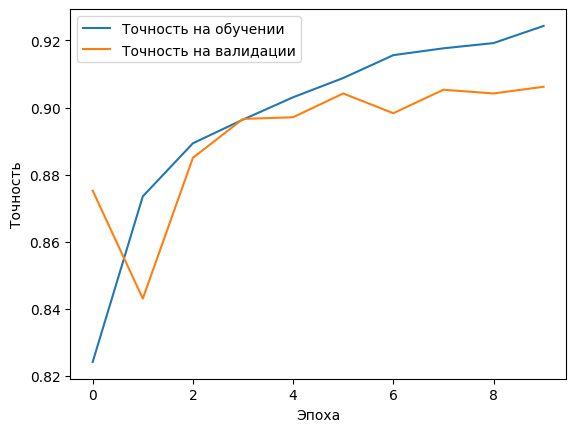

In [ ]:
model = keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2,2), strides=2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2),strides=2),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(112, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(img_train, label_train, batch_size=32, epochs=10,validation_data=(img_test,label_test),verbose=1)

plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [10]:
model.evaluate(img_test, label_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2645


[0.26450493931770325, 0.9061999917030334]

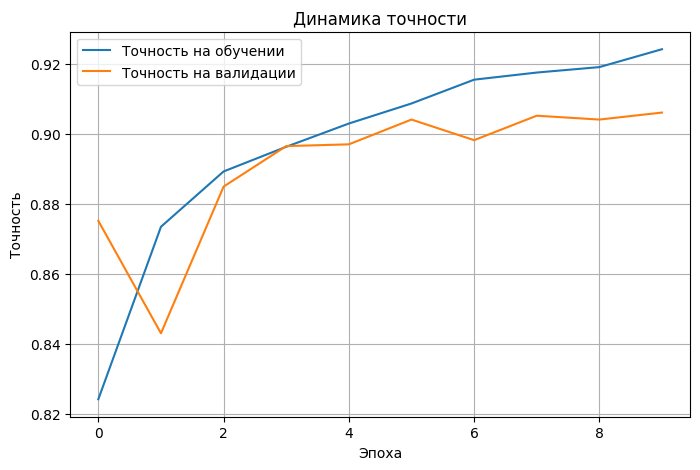

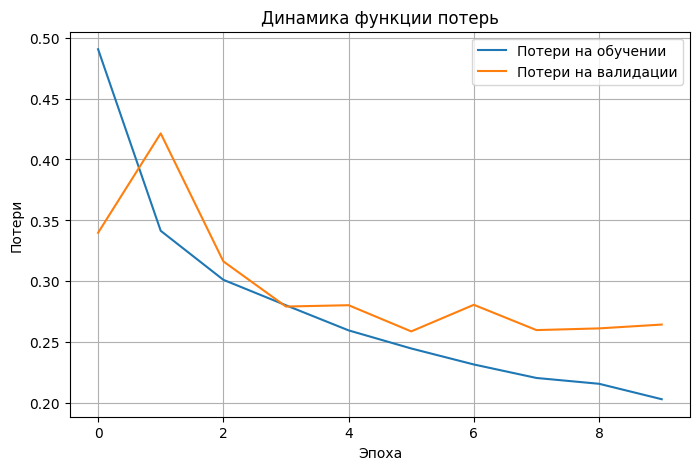

In [11]:
import matplotlib.pyplot as plt

# --- График точности ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Динамика точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)
plt.show()

# --- График потерь ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.title('Динамика функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)
plt.show()
